#### This Project contains following predictive models for the kickstarter dataset

* Logistic Regression Model
* Decision Tree Model
* Random Forest (ML - Classification)
* XGBoost (ML - Classification)
* Neural Network (Deep Learning - Multi-class Classification)
* Long Short-Term Memory (LSTM - Deep Learning)

## Reading the file

In [4]:
import pandas as pd
import numpy as np
kickstarter_df = pd.read_csv(filepath_or_buffer="C:/Users/laksh/Downloads/kickstarter_projects (3).csv", delimiter = ",")
kickstarter_df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


##### Removal of useless columns (qualitative) - no use in predictive modeling

In [6]:
colstoDrop = ['ID', 'Name']
kickstarter_df.drop(columns= colstoDrop, axis=1, inplace = True)

In [7]:
kickstarter_df.drop_duplicates(inplace=True)

In [8]:
kickstarter_df.head()

,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [9]:
import warnings
warnings.filterwarnings('ignore')

#### Project Overview
This project aims to predict the outcomes and pledged amounts of Kickstarter campaigns using machine learning (ML) and deep learning models. We will classify campaigns into one of four outcomes: `successful`, `failed`, `cancelled`,`live`, and `suspended`, as well as predict the total pledged amount.

#### Dataset Description
The dataset contains information on Kickstarter campaigns launched in 2012 and 2013. Key features include:
- **Category**: The broad category of the campaign (e.g., Film & Video).
- **Subcategory**: A more specific subcategory of the campaign (e.g., Shorts, Webseries).
- **Goal**: The funding goal set by the campaign creator.
- **Pledged**: The total amount pledged by backers.
- **Backers**: The number of people who backed the campaign.
- **Country**: The country of the campaign's origin.
- **Launched**: The launch date of the campaign.
- **Deadline**: The deadline for funding.
- **State**: The outcome of the campaign (successful, failed, cancelled, suspended, live).

### Project Steps

#### Step 1: Data Preprocessing
1. **Load the Dataset**
2. **Handle Missing Data**
3. **Feature Engineering**

#### Step 2: Exploratory Data Analysis (EDA)
1. **Univariate Analysis**
2. **Bivariate Analysis**
3. **Multivariate Analysis**

### Step 3: Model Selection
##### 3.1. Random Forest (Classification)
##### 3.2. XGBoost (Classification/Regression)
##### 3.3. Neural Networks (Deep Learning - Classification)
##### 3.4. LSTM (Deep Learning - Time Series)

#### Step 4: Model Evaluation
1. **Classification Metrics**
2. **Regression Metrics**
3. **Cross-Validation**

#### Step 5: Model Optimization
1. **Hyperparameter Tuning**
2. **Feature Selection**
3. **Regularization**

### 4. Conclusion

**Objective**: 
1. Predict the outcome of a campaign (successful, failed, cancelled, suspended, live).
2. Predict the total pledged amount.
3. Classify campaigns into the four possible outcomes.
4. Predict the pledged amount over time.

Here, we have multiple objectives since we are going to evaluate the dataset depending on the model we deploy as well

## Classification- Supervised ML Model, Random forest, XGBoost

##### AIM: Predict the outcome of a campaign (successful, failed, cancelled, suspended, live).

###### Load the dataset

In [17]:
kickstarter_df.head()

,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


In [18]:
kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Category     374853 non-null  object
 1   Subcategory  374853 non-null  object
 2   Country      374853 non-null  object
 3   Launched     374853 non-null  object
 4   Deadline     374853 non-null  object
 5   Goal         374853 non-null  int64 
 6   Pledged      374853 non-null  int64 
 7   Backers      374853 non-null  int64 
 8   State        374853 non-null  object
dtypes: int64(3), object(6)
memory usage: 25.7+ MB


In [19]:
kickstarter_df.nunique()

Category           15
Subcategory       159
Country            22
Launched       374297
Deadline         3164
Goal            27692
Pledged         39989
Backers          3963
State               5
dtype: int64

In [20]:
kickstarter_df.isnull().sum()

Category       0
Subcategory    0
Country        0
Launched       0
Deadline       0
Goal           0
Pledged        0
Backers        0
State          0
dtype: int64

In [21]:
# Convert 'Launched' and 'Deadline' columns to datetime
kickstarter_df['Launched'] = pd.to_datetime(kickstarter_df['Launched'], errors='coerce')
kickstarter_df['Deadline'] = pd.to_datetime(kickstarter_df['Deadline'], errors='coerce')

# Now extract year, month, day of the week, and hour
kickstarter_df['Launch_Year'] = kickstarter_df['Launched'].dt.year
kickstarter_df['Launch_Month'] = kickstarter_df['Launched'].dt.month
kickstarter_df['Launch_DayOfWeek'] = kickstarter_df['Launched'].dt.day_name()  # Categorical day names
kickstarter_df['Launch_Hour'] = kickstarter_df['Launched'].dt.hour

kickstarter_df['Deadline_Year'] = kickstarter_df['Deadline'].dt.year
kickstarter_df['Deadline_Month'] = kickstarter_df['Deadline'].dt.month
kickstarter_df['Deadline_DayOfWeek'] = kickstarter_df['Deadline'].dt.day_name()

# Calculate campaign duration in days
kickstarter_df['Campaign_Duration'] = (kickstarter_df['Deadline'] - kickstarter_df['Launched']).dt.days

# Preview the updated DataFrame with Campaign_Duration
kickstarter_df.head()


# Preview the transformed data
kickstarter_df.head()

,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Launch_Year,Launch_Month,Launch_DayOfWeek,Launch_Hour,Deadline_Year,Deadline_Month,Deadline_DayOfWeek,Campaign_Duration
0,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,2009,4,Tuesday,21,2009,5,Sunday,39
1,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,2009,4,Thursday,0,2009,7,Monday,87
2,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,2009,4,Friday,21,2009,5,Sunday,8
3,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,2009,4,Saturday,17,2009,7,Tuesday,79
4,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,2009,4,Monday,14,2009,5,Tuesday,28


In [22]:
kickstarter_df.nunique()

Category                  15
Subcategory              159
Country                   22
Launched              374297
Deadline                3164
Goal                   27692
Pledged                39989
Backers                 3963
State                      5
Launch_Year               10
Launch_Month              12
Launch_DayOfWeek           7
Launch_Hour               24
Deadline_Year             10
Deadline_Month            12
Deadline_DayOfWeek         7
Campaign_Duration         92
dtype: int64

1. Category - Categorical Variable - selected
2. Subcategory - Categorical Variable - selected
3. Goal - Continuous Variable - selected
4. Pledged - Continuous Variable - selected
5. Backers - Continuous Variable - selected
6. Country - Categorical Variable - selected
7. Launched - Not selected
8. Deadline - Not selected
9. State - Categorical Variable - selected (Target Variable)
10. Launch_Year - Categorical Variable - selected
11. Launch_Month - Categorical Variable - selected
12. Launch_DayOfWeek - Categorical Variable - selected
13. Launch_Hour - Continuous Variable - selected
14. Deadline_Year - Categorical Variable - selected
15. Deadline_Month - Categorical Variable - selected
16. Deadline_DayOfWeek - Categorical Variable - selected
17. Campaign_Duration (if you choose to calculate it) - Continuous Variable - selected

### Target variable - Feature Engineering

<Axes: xlabel='State'>

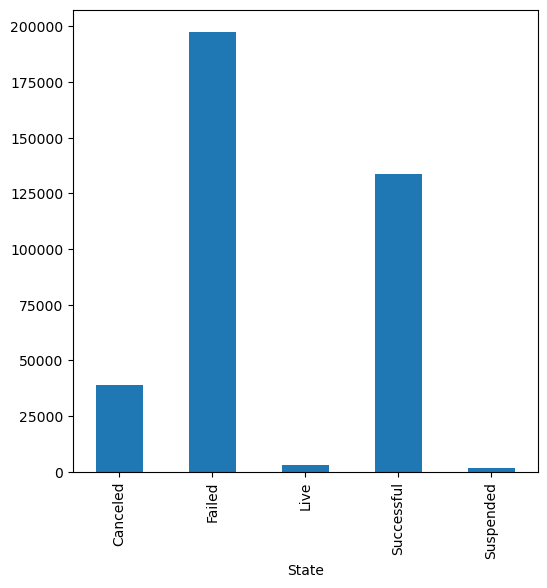

In [25]:
%matplotlib inline
GroupedData = kickstarter_df.groupby('State').size()
GroupedData.plot(kind = 'bar',figsize=(6,6))

## Univariate Analysis
#### Continuous Variable

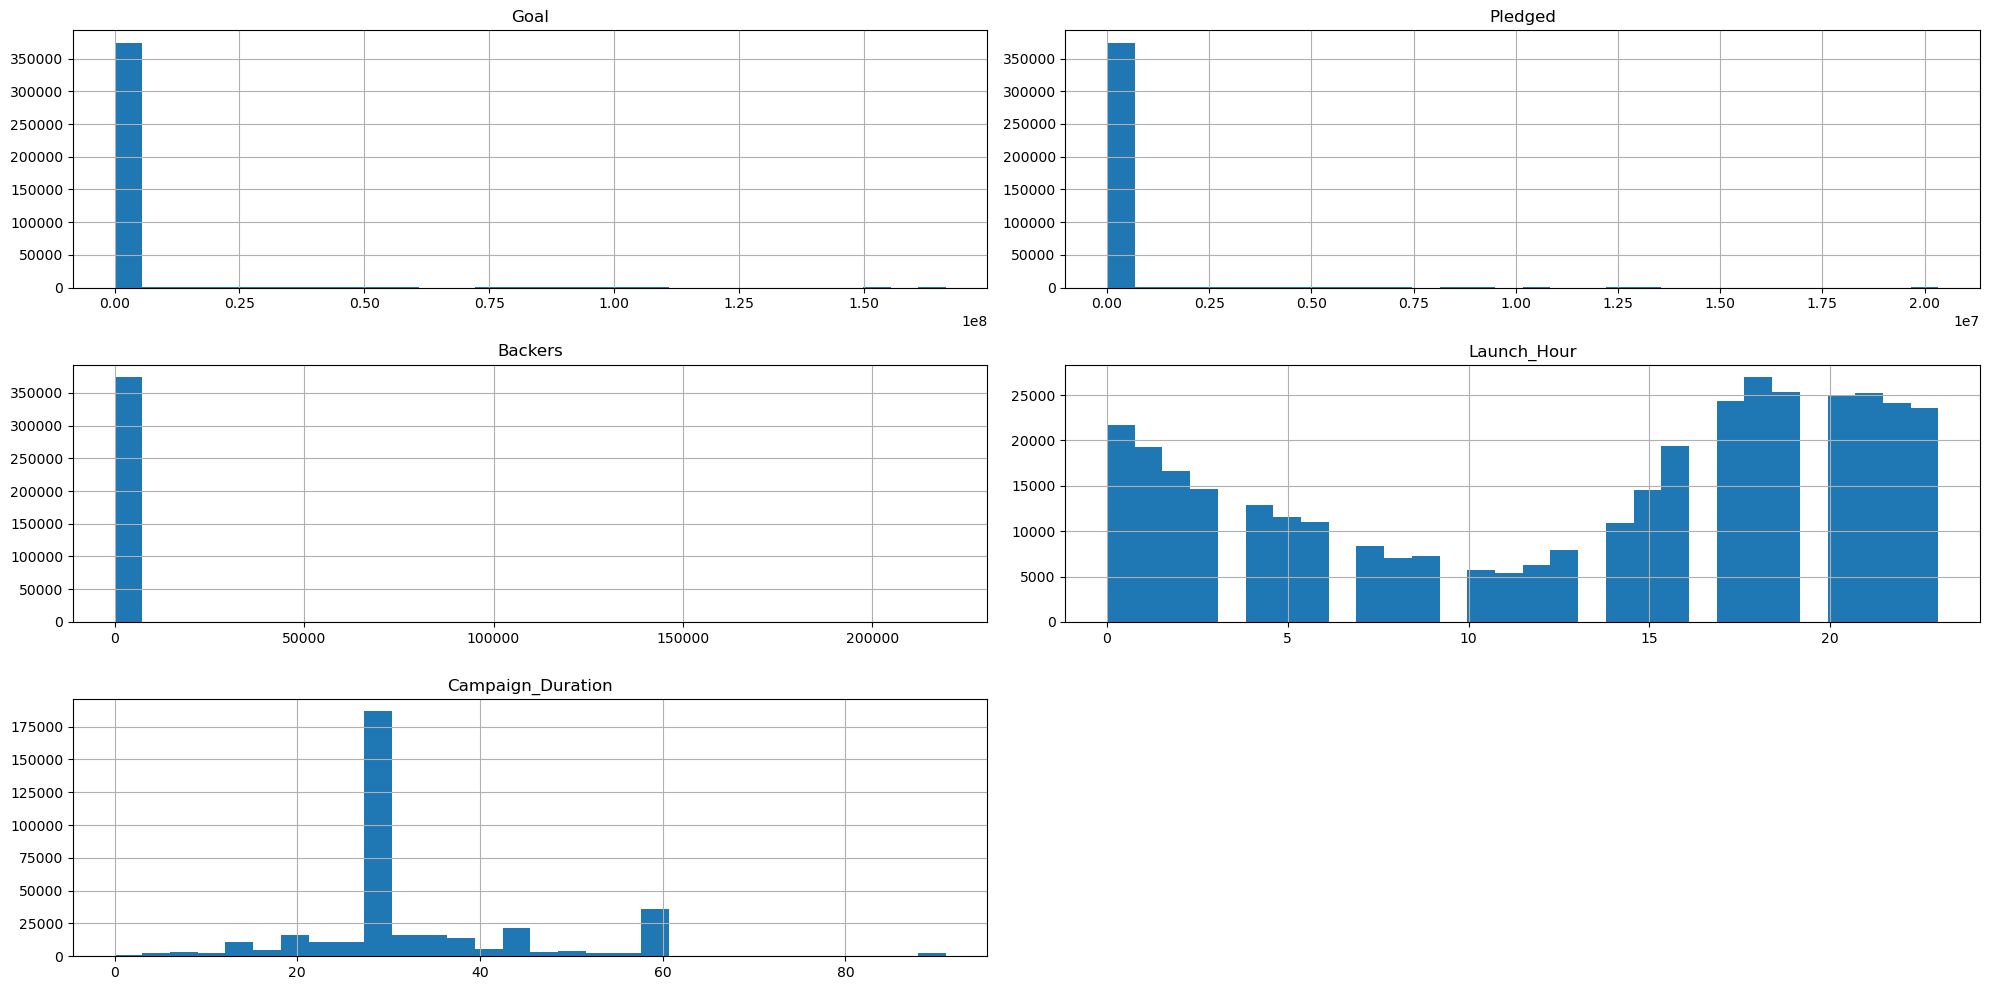

In [27]:
import matplotlib.pyplot as plt

# List of continuous variables for univariate analysis
continuous_variables = ['Goal', 'Pledged', 'Backers', 'Launch_Hour', 'Campaign_Duration']

# Plot histograms for each continuous variable
kickstarter_df[continuous_variables].hist(figsize=(20, 10), bins=30)

# Show the plot
plt.tight_layout()
plt.show()

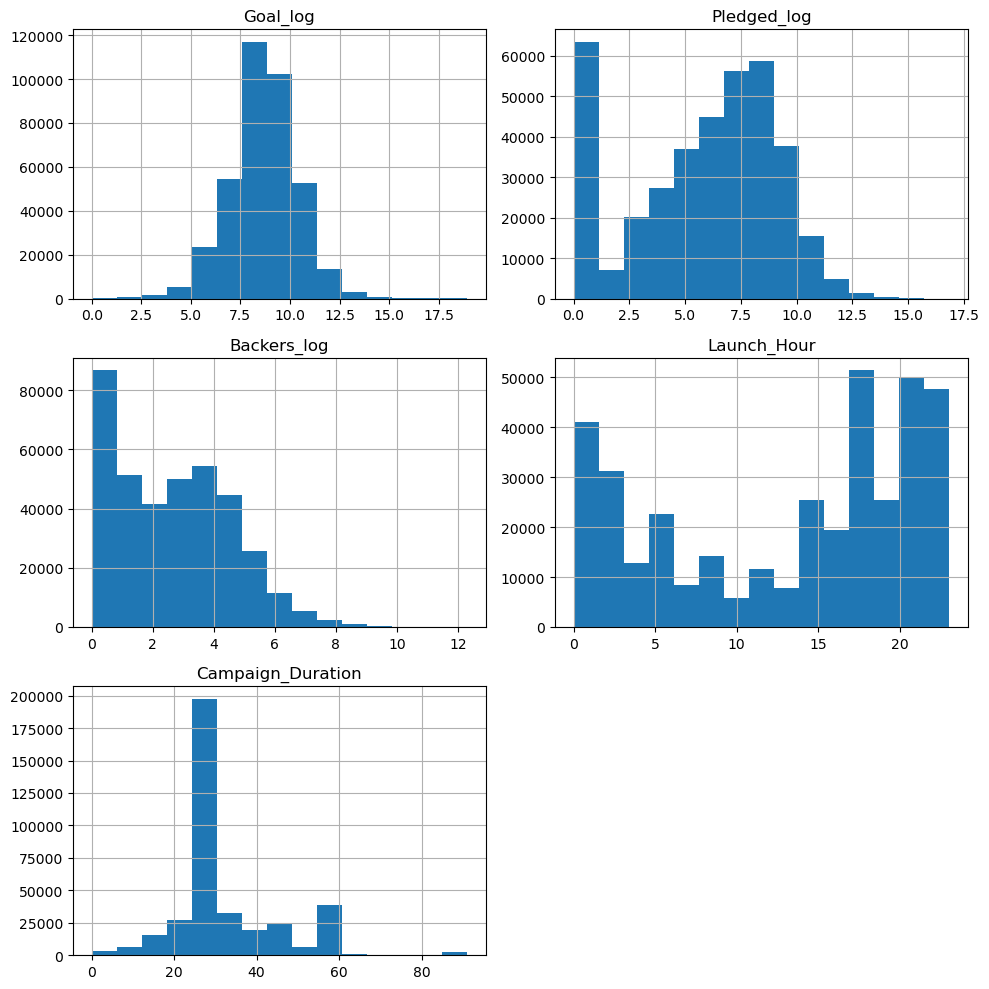

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Apply log transformation to the skewed continuous variables
kickstarter_df['Goal_log'] = np.log1p(kickstarter_df['Goal'])  # log1p adds 1 to avoid log(0)
kickstarter_df['Pledged_log'] = np.log1p(kickstarter_df['Pledged'])
kickstarter_df['Backers_log'] = np.log1p(kickstarter_df['Backers'])

# List of log-transformed continuous variables for univariate analysis
log_continuous_vars = ['Goal_log', 'Pledged_log', 'Backers_log', 'Launch_Hour', 'Campaign_Duration']

# Plot histograms for log-transformed variables
kickstarter_df[log_continuous_vars].hist(figsize=(10, 10), bins=15)

# Show the plot
plt.tight_layout()
plt.show()

### Outlier Treatment

In [30]:
# Safely set values using .loc to avoid SettingWithCopyWarning
kickstarter_df.loc[kickstarter_df['Goal_log'] >= 16, 'Goal_log'] = np.mean(kickstarter_df.loc[kickstarter_df['Goal_log'] >= 16, 'Goal_log'])

In [31]:
kickstarter_df.loc[kickstarter_df['Goal_log'] <= 2, 'Goal_log'] = np.mean(kickstarter_df.loc[kickstarter_df['Goal_log'] <= 2, 'Goal_log'])

<Axes: >

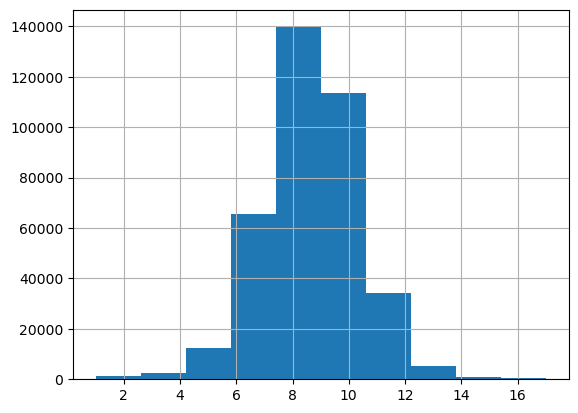

In [32]:
kickstarter_df['Goal_log'].hist()

In [33]:
kickstarter_df.loc[kickstarter_df['Pledged_log'] >= 13.5, 'Pledged_log'] = np.mean(kickstarter_df.loc[kickstarter_df['Pledged_log'] >= 13.5, 'Pledged_log'])

<Axes: >

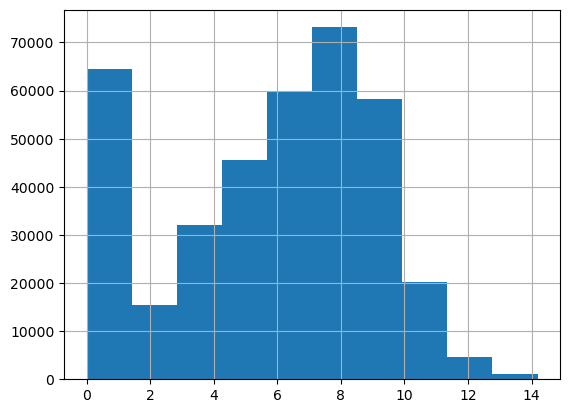

In [34]:
kickstarter_df['Pledged_log'].hist()

In [35]:
kickstarter_df.loc[kickstarter_df['Backers_log'] >= 8.2, 'Backers_log'] = np.mean(kickstarter_df.loc[kickstarter_df['Backers_log'] >= 8.2, 'Backers_log'])

<Axes: >

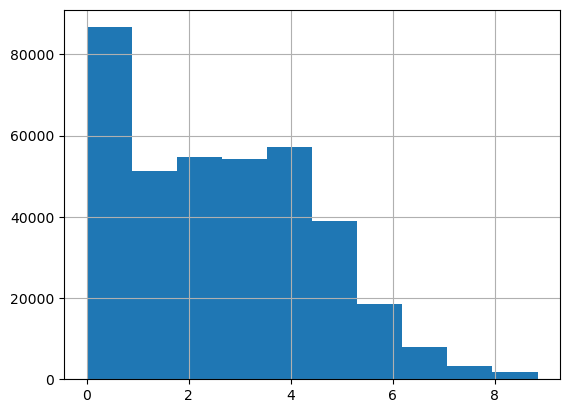

In [36]:
kickstarter_df['Backers_log'].hist()

In [37]:
# Convert 'Campaign_Duration' to float type to accommodate non-integer values
kickstarter_df['Campaign_Duration'] = kickstarter_df['Campaign_Duration'].astype(float)

# Now safely assign the mean value to rows where 'Campaign_Duration' >= 80
kickstarter_df.loc[kickstarter_df['Campaign_Duration'] >= 80, 'Campaign_Duration'] = np.mean(kickstarter_df.loc[kickstarter_df['Campaign_Duration'] >= 80, 'Campaign_Duration'])

<Axes: >

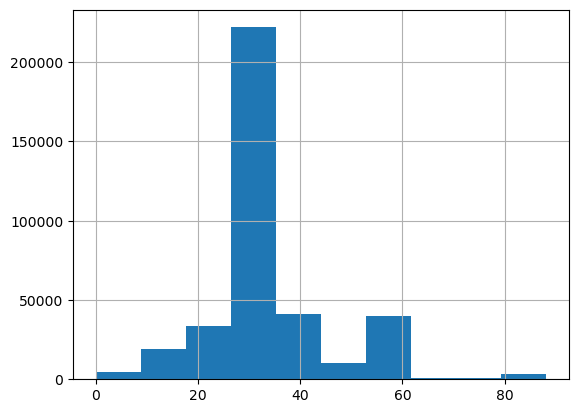

In [38]:
kickstarter_df['Campaign_Duration'].hist()

In [39]:
import numpy as np

# Convert log-transformed values back to original scale using np.expm1()
kickstarter_df['Goal'] = np.expm1(kickstarter_df['Goal_log'])  # expm1 reverses the log1p transformation
kickstarter_df['Pledged'] = np.expm1(kickstarter_df['Pledged_log'])
kickstarter_df['Backers'] = np.expm1(kickstarter_df['Backers_log'])

# Drop the log-transformed columns if they are no longer needed
kickstarter_df = kickstarter_df.drop(['Goal_log', 'Pledged_log', 'Backers_log'], axis=1)

# Preview the DataFrame after conversion
kickstarter_df.head()

,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Launch_Year,Launch_Month,Launch_DayOfWeek,Launch_Hour,Deadline_Year,Deadline_Month,Deadline_DayOfWeek,Campaign_Duration
0,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000.0,625.0,30.0,Failed,2009,4,Tuesday,21,2009,5,Sunday,39.000000
1,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000.0,22.0,3.0,Failed,2009,4,Thursday,0,2009,7,Monday,88.144132
2,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20.0,35.0,3.0,Successful,2009,4,Friday,21,2009,5,Sunday,8.000000
3,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99.0,145.0,25.0,Successful,2009,4,Saturday,17,2009,7,Tuesday,79.000000
4,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900.0,387.0,10.0,Failed,2009,4,Monday,14,2009,5,Tuesday,28.000000


#### Categorical Variable

In [41]:
kickstarter_df.columns

Index(['Category', 'Subcategory', 'Country', 'Launched', 'Deadline', 'Goal',
       'Pledged', 'Backers', 'State', 'Launch_Year', 'Launch_Month',
       'Launch_DayOfWeek', 'Launch_Hour', 'Deadline_Year', 'Deadline_Month',
       'Deadline_DayOfWeek', 'Campaign_Duration'],
      dtype='object')

In [42]:
Categorical_Variables = ['Category', 'Subcategory', 'Country','Launch_Year', 'Launch_Month',
       'Launch_DayOfWeek','Deadline_Year', 'Deadline_Month',
       'Deadline_DayOfWeek']

def PlotBarCharts(inpData, ColstoPlot):
    %matplotlib inline
    import matplotlib.pyplot as plt

    # Determine the number of columns to plot
    num_cols = len(ColstoPlot)
    fig, subplots = plt.subplots(nrows=1, ncols=num_cols, figsize=(20 * num_cols, 8))  # Increase figure size

    # If there's only one column, subplots is not a list, so we need to handle it separately
    if num_cols == 1:
        subplots = [subplots]

    for colname, plotnumber in zip(ColstoPlot, range(num_cols)):
        inpData[colname].value_counts().plot(kind='bar', ax=subplots[plotnumber], color='skyblue', edgecolor='black')
        subplots[plotnumber].set_title(colname, fontsize=14)
        subplots[plotnumber].set_xlabel(colname, fontsize=12)
        subplots[plotnumber].set_ylabel('Count', fontsize=12)
        subplots[plotnumber].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability
        subplots[plotnumber].tick_params(axis='y', labelsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to prevent title overlap
    plt.show()

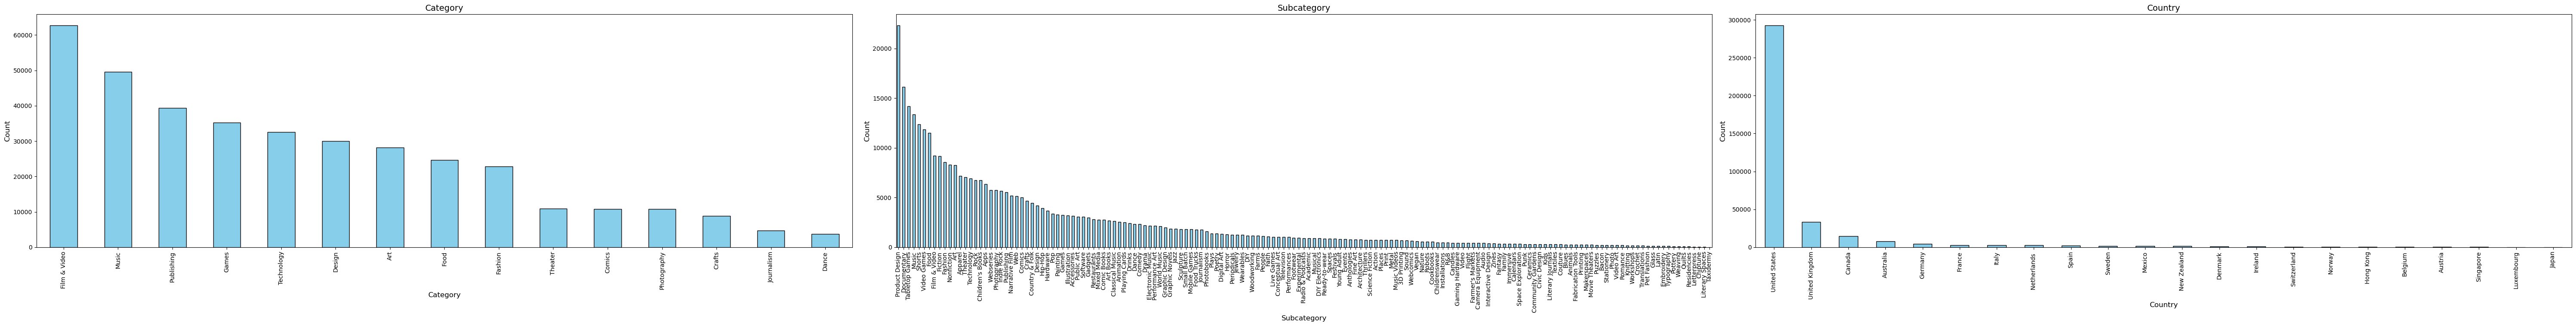

In [43]:
Categorical_Variables = ['Category', 'Subcategory', 'Country']
PlotBarCharts(kickstarter_df,Categorical_Variables)

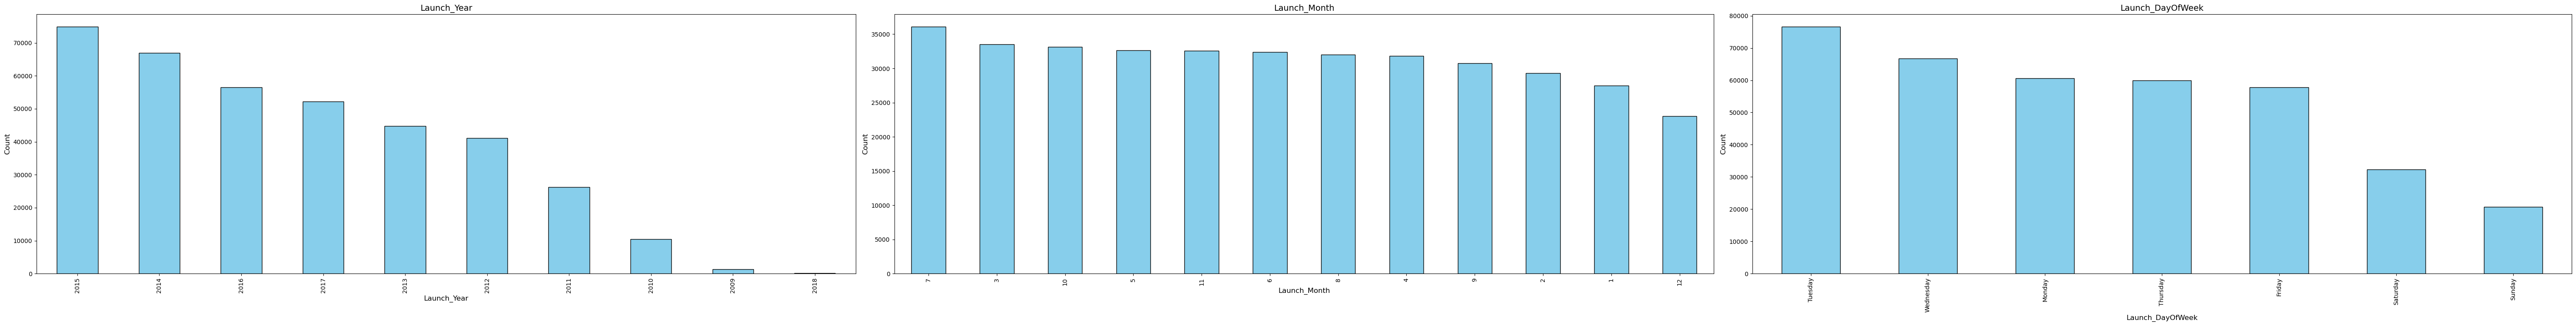

In [44]:
Categorical_Variables = ['Launch_Year', 'Launch_Month','Launch_DayOfWeek']
PlotBarCharts(kickstarter_df,Categorical_Variables)

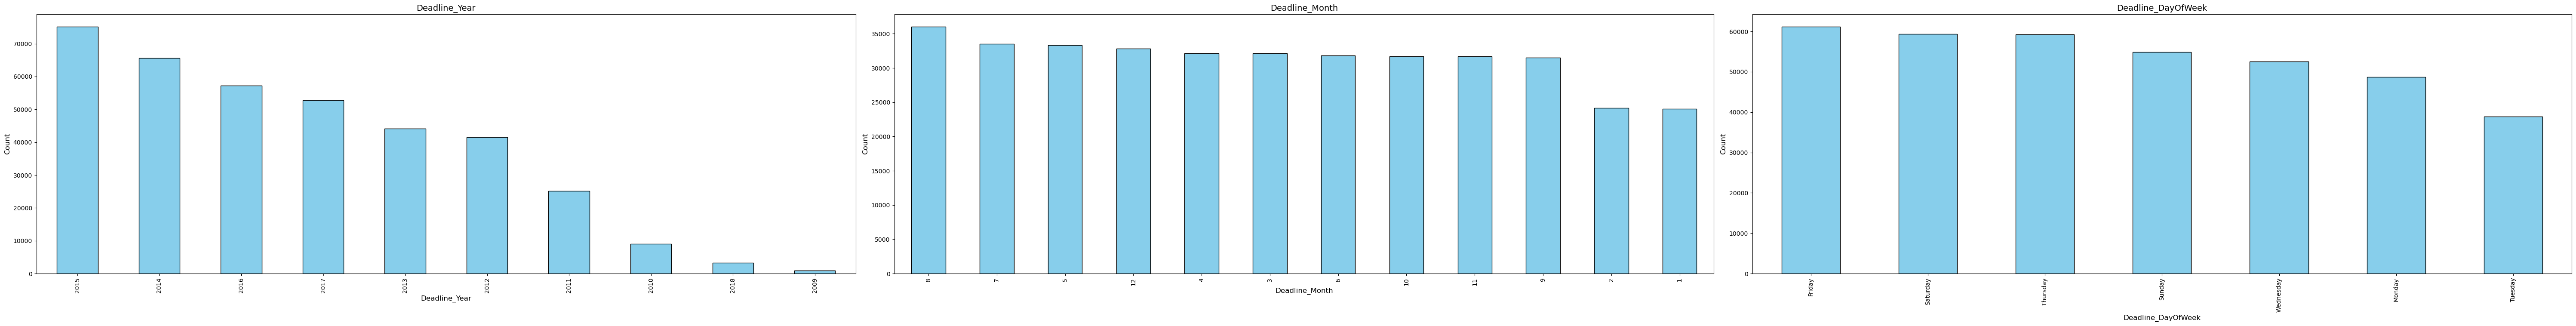

In [45]:
Categorical_Variables = ['Deadline_Year', 'Deadline_Month','Deadline_DayOfWeek']
PlotBarCharts(kickstarter_df,Categorical_Variables)

###### No need for outlier Treatment, We move on to Bivariate analysis

Missing Values Treatment

In [48]:
kickstarter_df.isnull().sum()

Category              0
Subcategory           0
Country               0
Launched              0
Deadline              0
Goal                  0
Pledged               0
Backers               0
State                 0
Launch_Year           0
Launch_Month          0
Launch_DayOfWeek      0
Launch_Hour           0
Deadline_Year         0
Deadline_Month        0
Deadline_DayOfWeek    0
Campaign_Duration     0
dtype: int64

No missing values!!!

## Bivariate Analysis

## Visual exploration of relationship between variables
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots

## Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

### Visual EDA

#### Categorical Vs Continuous

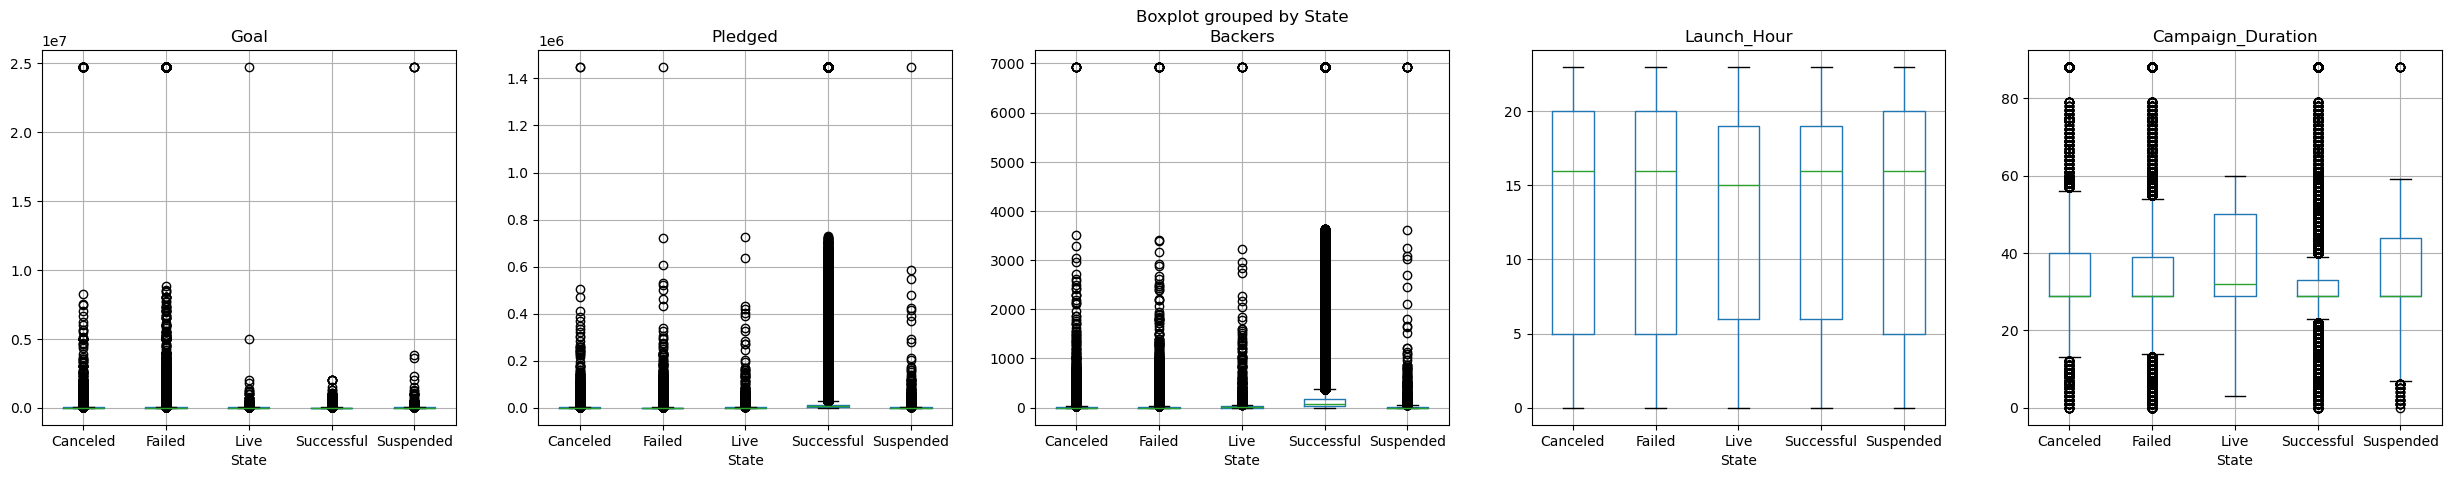

In [54]:
continuous_variables = ['Goal', 'Pledged', 'Backers', 'Launch_Hour', 'Campaign_Duration']

import matplotlib.pyplot as plt
fig, subplots = plt.subplots(nrows = 1, ncols = len(continuous_variables), figsize = (30,5))

for colname, i in zip(continuous_variables, range(len(continuous_variables))):
    kickstarter_df.boxplot(column=(colname), by='State',figsize=(5,5),vert =True, ax = subplots[i])

### We test this by Anova Test (Statistical Feature Selection):

In [56]:
def AnovaTest(inpData, TarVar, PredCols):
    from scipy.stats import f_oneway

    SelectedPredCols = []

    for pred in PredCols:
        CategoryGroupLists = inpData.groupby(TarVar)[pred].apply(list)
        AnovaRes = f_oneway(*CategoryGroupLists)

        if AnovaRes[1] < 0.05:
            print(f'{pred} is correlated with {TarVar} with a p-value: {AnovaRes}')
            SelectedPredCols.append(pred)

        else:
            print(f'{pred} is NOT correlated with {TarVar} with a p-value: {AnovaRes}')

    return (SelectedPredCols)

In [57]:
AnovaTest(kickstarter_df,'State', continuous_variables)

Goal is correlated with State with a p-value: F_onewayResult(statistic=144.69690813993915, pvalue=7.535510751997773e-124)
Pledged is correlated with State with a p-value: F_onewayResult(statistic=2819.512348548446, pvalue=0.0)
Backers is correlated with State with a p-value: F_onewayResult(statistic=5496.953475350184, pvalue=0.0)
Launch_Hour is correlated with State with a p-value: F_onewayResult(statistic=9.781880948592661, pvalue=6.562495395239106e-08)
Campaign_Duration is correlated with State with a p-value: F_onewayResult(statistic=1488.3906217436522, pvalue=0.0)


['Goal', 'Pledged', 'Backers', 'Launch_Hour', 'Campaign_Duration']

##### Final Selected Continuous Columns : 
*['Goal', 'Pledged', 'Backers', 'Launch_Hour', 'Campaign_Duration']*

#### Categorical vs Categorical

In [60]:
Categorical_Variables = ['Category', 'Subcategory', 'Country','Launch_Year', 'Launch_Month',
       'Launch_DayOfWeek','Deadline_Year', 'Deadline_Month',
       'Deadline_DayOfWeek']

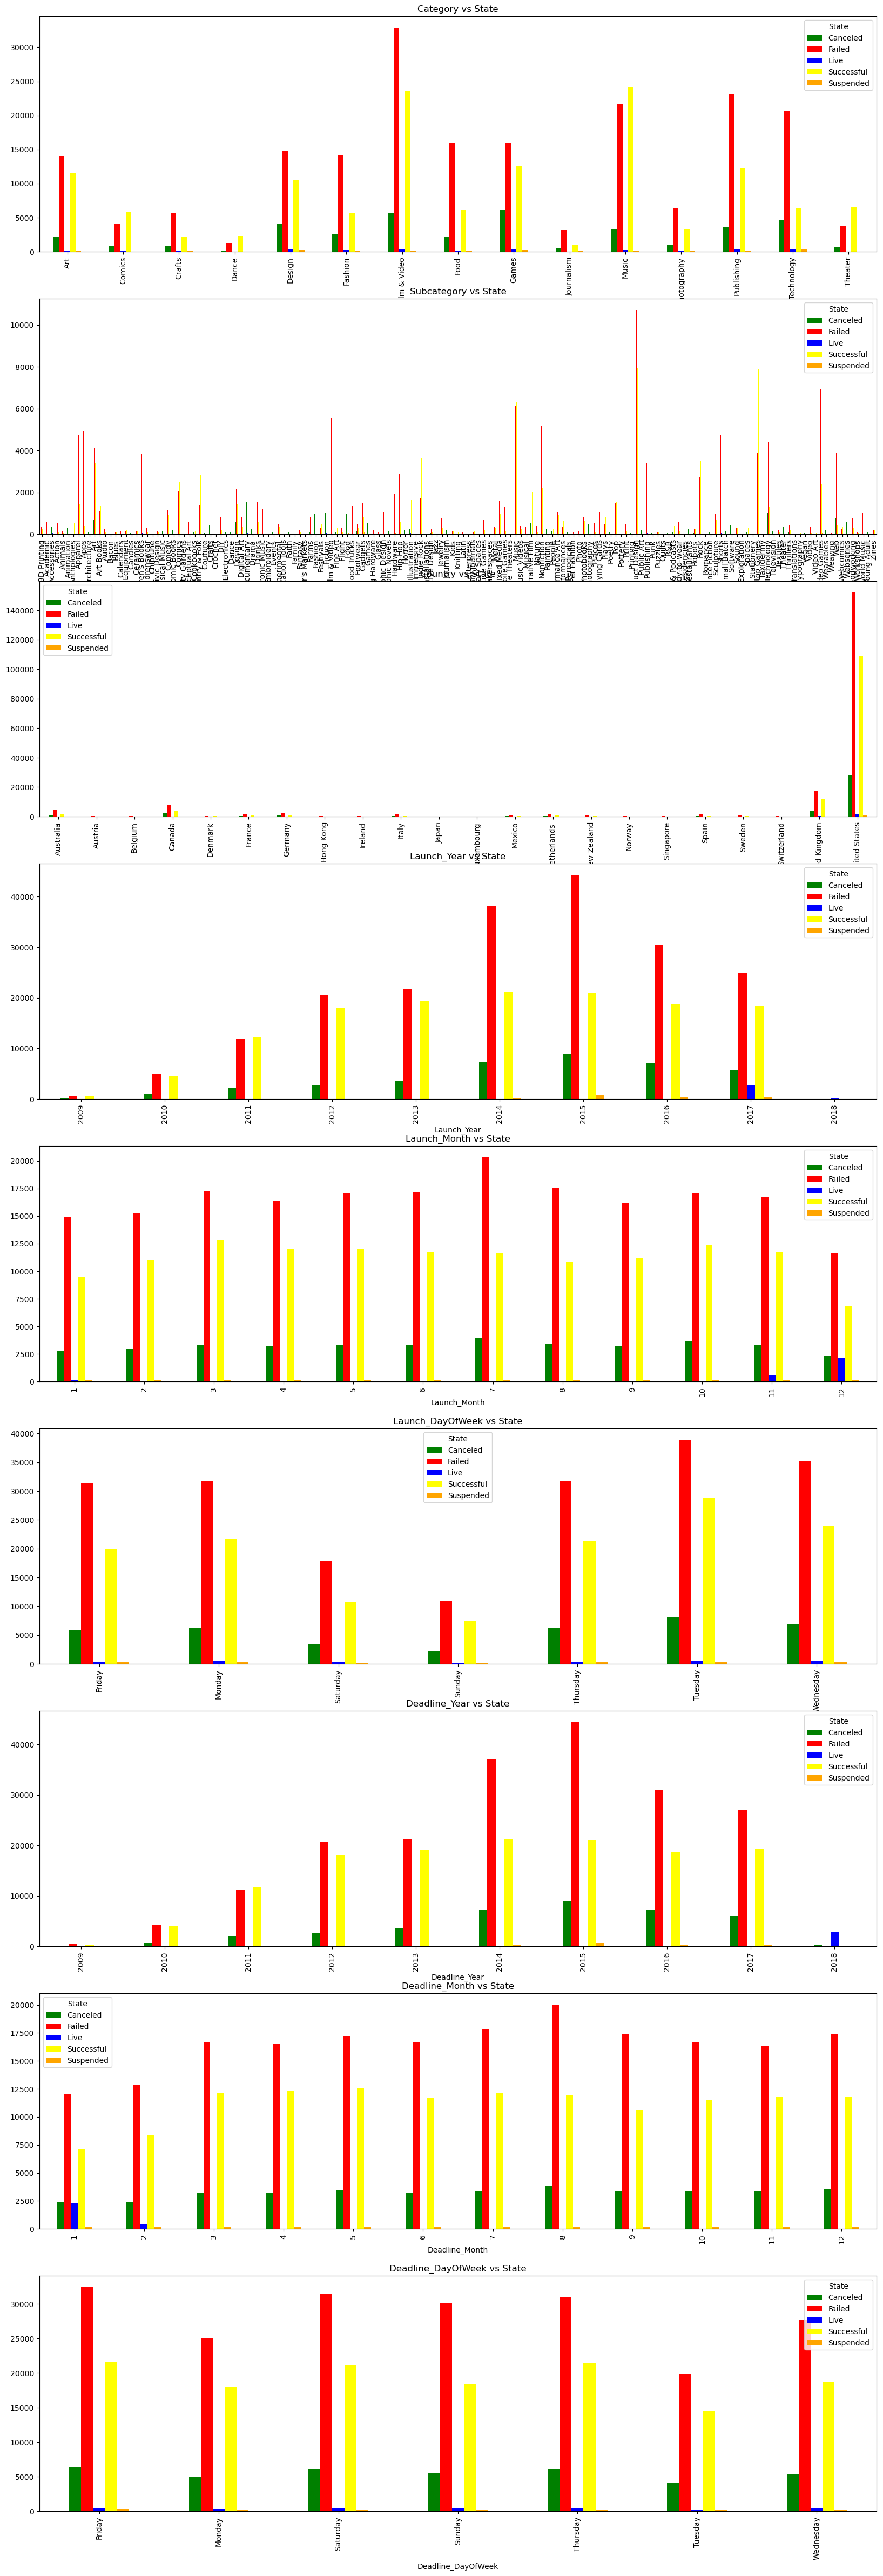

In [61]:
import matplotlib.pyplot as plt

fig, plotcanvas = plt.subplots(nrows = len(Categorical_Variables), ncols = 1, figsize = (20,60))

for predName, i in zip(Categorical_Variables, range(len(Categorical_Variables))):
    CrosstabRes = pd.crosstab(index= kickstarter_df[predName], columns=kickstarter_df['State'])
    CrosstabRes.plot.bar(color = ['green','red','blue','yellow','orange'],ax= plotcanvas[i],title = predName + " vs " + "State")

## Chi-Square Test (Statistical Feature Selection)

In [63]:
def ChiSqTest(inpData, TarVar, PredCols):
    from scipy.stats import chi2_contingency

    SelectedCols = []

    for pred in PredCols:
        crosstabres = pd.crosstab(index= kickstarter_df[TarVar], columns=kickstarter_df[pred])
        Chi2Res = chi2_contingency(crosstabres)

        if Chi2Res[1] < 0.05:
            print(f'{pred} is correlated with {TarVar} with a p-value: {Chi2Res[1]}')
            SelectedCols.append(pred)

        else:
            print(f'{pred} is NOT correlated with {TarVar} with a p-value: {Chi2Res[1]}')

    return (SelectedCols)

In [64]:
ChiSqTest(kickstarter_df,'State',Categorical_Variables)

Category is correlated with State with a p-value: 0.0
Subcategory is correlated with State with a p-value: 0.0
Country is correlated with State with a p-value: 0.0
Launch_Year is correlated with State with a p-value: 0.0
Launch_Month is correlated with State with a p-value: 0.0
Launch_DayOfWeek is correlated with State with a p-value: 1.9811875577846212e-61
Deadline_Year is correlated with State with a p-value: 0.0
Deadline_Month is correlated with State with a p-value: 0.0
Deadline_DayOfWeek is correlated with State with a p-value: 8.440688176533807e-38


['Category',
 'Subcategory',
 'Country',
 'Launch_Year',
 'Launch_Month',
 'Launch_DayOfWeek',
 'Deadline_Year',
 'Deadline_Month',
 'Deadline_DayOfWeek']

In [65]:
SelectedCols = ['Goal', 'Pledged', 'Backers', 'Launch_Hour', 'Campaign_Duration','Category','Subcategory','Country',
                'Launch_Year','Launch_Month','Launch_DayOfWeek','Deadline_Year','Deadline_Month','Deadline_DayOfWeek']

In [66]:
DataForML = kickstarter_df[SelectedCols]
DataForML['State'] = kickstarter_df['State']
DataForML.head()

,Goal,Pledged,Backers,Launch_Hour,Campaign_Duration,Category,Subcategory,Country,Launch_Year,Launch_Month,Launch_DayOfWeek,Deadline_Year,Deadline_Month,Deadline_DayOfWeek,State
0,1000.0,625.0,30.0,21,39.000000,Fashion,Fashion,United States,2009,4,Tuesday,2009,5,Sunday,Failed
1,80000.0,22.0,3.0,0,88.144132,Film & Video,Shorts,United States,2009,4,Thursday,2009,7,Monday,Failed
2,20.0,35.0,3.0,21,8.000000,Art,Illustration,United States,2009,4,Friday,2009,5,Sunday,Successful
3,99.0,145.0,25.0,17,79.000000,Technology,Software,United States,2009,4,Saturday,2009,7,Tuesday,Successful
4,1900.0,387.0,10.0,14,28.000000,Fashion,Fashion,United States,2009,4,Monday,2009,5,Tuesday,Failed


#### Training the Models: 
##### Objective 1: Predict the outcome of a campaign (successful, failed, cancelled, suspended, live)

1. Logistic Regression
2. Decision Tree
3. Random Tree
4. XGboost

In [68]:
DataForML.to_pickle('DataforML.pkl')

In [69]:
# Data For Conversion

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Categorical variables for one-hot encoding
categorical_columns = ['Category', 'Subcategory', 'Country', 'Launch_DayOfWeek', 'Deadline_DayOfWeek']

# One-hot encoding categorical variables
kickstarter_df_encoded = pd.get_dummies(kickstarter_df, columns=categorical_columns, drop_first=True, dtype='int')

# Columns that are continuous and should be scaled
continuous_columns = ['Goal', 'Pledged', 'Backers', 'Launch_Hour', 'Campaign_Duration']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale continuous variables
kickstarter_df_encoded[continuous_columns] = scaler.fit_transform(kickstarter_df_encoded[continuous_columns])

# Preview the processed DataFrame
kickstarter_df_encoded.head()

,Launched,Deadline,Goal,Pledged,Backers,State,Launch_Year,Launch_Month,Launch_Hour,Deadline_Year,...,Launch_DayOfWeek_Sunday,Launch_DayOfWeek_Thursday,Launch_DayOfWeek_Tuesday,Launch_DayOfWeek_Wednesday,Deadline_DayOfWeek_Monday,Deadline_DayOfWeek_Saturday,Deadline_DayOfWeek_Sunday,Deadline_DayOfWeek_Thursday,Deadline_DayOfWeek_Tuesday,Deadline_DayOfWeek_Wednesday
0,2009-04-21 21:02:48,2009-05-31,-0.065510,-0.144393,-0.151769,Failed,2009,4,1.025740,2009,...,0,0,1,0,0,0,1,0,0,0
1,2009-04-23 00:07:53,2009-07-20,0.068290,-0.155170,-0.210822,Failed,2009,4,-1.698570,2009,...,0,1,0,0,1,0,0,0,0,0
2,2009-04-24 21:52:03,2009-05-03,-0.067170,-0.154938,-0.210822,Successful,2009,4,1.025740,2009,...,0,0,0,0,0,0,1,0,0,0
3,2009-04-25 17:36:21,2009-07-14,-0.067036,-0.152972,-0.162705,Successful,2009,4,0.506824,2009,...,0,0,0,0,0,0,0,0,1,0
4,2009-04-27 14:10:39,2009-05-26,-0.063985,-0.148647,-0.195512,Failed,2009,4,0.117637,2009,...,0,0,0,0,0,0,0,0,1,0


In [70]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'State' column
kickstarter_df_encoded['State'] = label_encoder.fit_transform(kickstarter_df['State'])

# Check label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Preview the encoded DataFrame
kickstarter_df_encoded.head()

Label Mapping: {'Canceled': 0, 'Failed': 1, 'Live': 2, 'Successful': 3, 'Suspended': 4}


,Launched,Deadline,Goal,Pledged,Backers,State,Launch_Year,Launch_Month,Launch_Hour,Deadline_Year,...,Launch_DayOfWeek_Sunday,Launch_DayOfWeek_Thursday,Launch_DayOfWeek_Tuesday,Launch_DayOfWeek_Wednesday,Deadline_DayOfWeek_Monday,Deadline_DayOfWeek_Saturday,Deadline_DayOfWeek_Sunday,Deadline_DayOfWeek_Thursday,Deadline_DayOfWeek_Tuesday,Deadline_DayOfWeek_Wednesday
0,2009-04-21 21:02:48,2009-05-31,-0.065510,-0.144393,-0.151769,1,2009,4,1.025740,2009,...,0,0,1,0,0,0,1,0,0,0
1,2009-04-23 00:07:53,2009-07-20,0.068290,-0.155170,-0.210822,1,2009,4,-1.698570,2009,...,0,1,0,0,1,0,0,0,0,0
2,2009-04-24 21:52:03,2009-05-03,-0.067170,-0.154938,-0.210822,3,2009,4,1.025740,2009,...,0,0,0,0,0,0,1,0,0,0
3,2009-04-25 17:36:21,2009-07-14,-0.067036,-0.152972,-0.162705,3,2009,4,0.506824,2009,...,0,0,0,0,0,0,0,0,1,0
4,2009-04-27 14:10:39,2009-05-26,-0.063985,-0.148647,-0.195512,1,2009,4,0.117637,2009,...,0,0,0,0,0,0,0,0,1,0


In [71]:
kickstarter_df_encoded.drop(columns=['Launched','Deadline'], inplace=True)

In [72]:
DataForML = kickstarter_df_encoded
DataForML.head()

,Goal,Pledged,Backers,State,Launch_Year,Launch_Month,Launch_Hour,Deadline_Year,Deadline_Month,Campaign_Duration,...,Launch_DayOfWeek_Sunday,Launch_DayOfWeek_Thursday,Launch_DayOfWeek_Tuesday,Launch_DayOfWeek_Wednesday,Deadline_DayOfWeek_Monday,Deadline_DayOfWeek_Saturday,Deadline_DayOfWeek_Sunday,Deadline_DayOfWeek_Thursday,Deadline_DayOfWeek_Tuesday,Deadline_DayOfWeek_Wednesday
0,-0.065510,-0.144393,-0.151769,1,2009,4,1.025740,2009,5,0.451669,...,0,0,1,0,0,0,1,0,0,0
1,0.068290,-0.155170,-0.210822,1,2009,4,-1.698570,2009,7,4.290093,...,0,1,0,0,1,0,0,0,0,0
2,-0.067170,-0.154938,-0.210822,3,2009,4,1.025740,2009,5,-1.969600,...,0,0,0,0,0,0,1,0,0,0
3,-0.067036,-0.152972,-0.162705,3,2009,4,0.506824,2009,7,3.575887,...,0,0,0,0,0,0,0,0,1,0
4,-0.063985,-0.148647,-0.195512,1,2009,4,0.117637,2009,5,-0.407491,...,0,0,0,0,0,0,0,0,1,0


### Splitting The Data into Test and Train

In [74]:
from sklearn.model_selection import train_test_split

Top_15_Features_Importances = ['Backers','Pledged','Goal','Deadline_Year','Category_Games','Subcategory_Tabletop Games','Deadline_DayOfWeek_Monday',
                               'Launch_Month','Campaign_Duration','Launch_Hour','Deadline_DayOfWeek_Tuesday','Country_Sweden','Subcategory_Poetry',
                               'Subcategory_Faith','Subcategory_Product Design']
# Features (X) and target (y)
X = DataForML.drop('State', axis=1)

## Getting the results with the top 15 features based on it's importance on predicting the output
X = DataForML[Top_15_Features_Importances]
y = DataForML['State']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(262397, 15)
(262397,)
(112456, 15)
(112456,)


## Logistic Regression

In [76]:
# Logistic Regression Implementation
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression with L2 (Ridge) regularization and 'newton-cg' solver
# l1 = Lasso regularization, l2 = Ridge regularization
# 'C=1' controls regularization strength, 'solver' determines the optimization algorithm
clf = LogisticRegression(C=10, penalty='l2', solver='newton-cg', max_iter=1000)

# Print the logistic regression model parameters
print("# Logistic Regression Model Parameters:")
print(clf)

# Fitting the model on Training Data
LOG = clf.fit(X_train, y_train)

# Making predictions on the test set
prediction = LOG.predict(X_test)

# Measuring accuracy and performance on Testing Data
print("\n# Classification Report:")
print(metrics.classification_report(y_test, prediction))

print("\n# Confusion Matrix:")
print(metrics.confusion_matrix(y_test, prediction))

# Calculate F1-Score as the accuracy metric (weighted average to handle class imbalance)
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print(f"\n# F1-Score (Weighted): {round(F1_Score, 2)}")

# Cross-validation: Running 10-Fold Cross validation
# Cross_val_score will split the data into 10 subsets and test model performance on each fold
print("\n# Running 10-Fold Cross Validation:")
Accuracy_Values = cross_val_score(LOG, X, y, cv=10, scoring='f1_weighted')

# Print individual accuracy values for each fold
print("Accuracy values for 10-fold Cross Validation:\n", Accuracy_Values)

# Print the average accuracy from 10-Fold Cross Validation
Logistic_Regression_Results = round(Accuracy_Values.mean(), 2)
print(f"\n# Final Average Accuracy from Cross-Validation: {Logistic_Regression_Results}")


# Logistic Regression Model Parameters:
LogisticRegression(C=10, max_iter=1000, solver='newton-cg')

# Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.00      0.01     11661
           1       0.81      0.98      0.89     59328
           2       0.06      0.00      0.00       822
           3       0.96      0.97      0.97     40124
           4       0.00      0.00      0.00       521

    accuracy                           0.86    112456
   macro avg       0.43      0.39      0.37    112456
weighted avg       0.81      0.86      0.81    112456


# Confusion Matrix:
[[   39 11262     6   351     3]
 [   76 58167     7  1072     6]
 [    0   687     1   134     0]
 [    0  1086     1 39036     1]
 [    1   413     1   106     0]]

# F1-Score (Weighted): 0.81

# Running 10-Fold Cross Validation:
Accuracy values for 10-fold Cross Validation:
 [0.81099612 0.81769299 0.81799954 0.81367635 0.80789411 0.79878808
 0.81456385 0.8139

## Decision Tree

# Decision Tree Model Parameters:
DecisionTreeClassifier(max_depth=6)

# Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.00      0.01     11661
           1       0.83      0.98      0.90     59328
           2       0.88      0.94      0.91       822
           3       0.95      0.99      0.97     40124
           4       0.00      0.00      0.00       521

    accuracy                           0.87    112456
   macro avg       0.65      0.58      0.56    112456
weighted avg       0.85      0.87      0.83    112456


# Confusion Matrix:
[[   40 11080    60   481     0]
 [   23 57931    21  1352     1]
 [    3    34   771    14     0]
 [    0   513    25 39586     0]
 [    0   418     4    99     0]]

# F1-Score (Weighted): 0.83

# Feature Importance (Top 10):


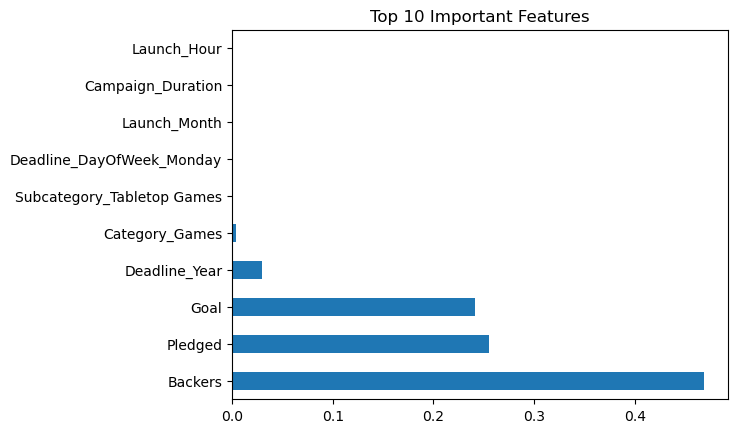


# Running 10-Fold Cross Validation:
Accuracy values for 10-fold Cross Validation:
 [0.8274854  0.82327937 0.82509938 0.81840741 0.82278796 0.82596447
 0.82602787 0.8249879  0.82574507 0.81980441]

# Final Average Accuracy from Cross-Validation: 0.82


In [78]:
# Decision Trees Implementation
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Decision Tree Classifier with maximum depth of 6 and 'gini' criterion
# max_depth: Controls the depth of the tree, criterion: Splitting strategy ('gini' or 'entropy')
clf = tree.DecisionTreeClassifier(max_depth=6, criterion='gini')

# Print the decision tree model parameters
print("# Decision Tree Model Parameters:")
print(clf)

# Fitting the model on Training Data
DTree = clf.fit(X_train, y_train)

# Making predictions on the test set
prediction = DTree.predict(X_test)

# Measuring accuracy and performance on Testing Data
print("\n# Classification Report:")
print(metrics.classification_report(y_test, prediction))

print("\n# Confusion Matrix:")
print(metrics.confusion_matrix(y_test, prediction))

# Calculate F1-Score as the accuracy metric (weighted average to handle class imbalance)
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print(f"\n# F1-Score (Weighted): {round(F1_Score, 2)}")

# Feature Importance: Plotting the top 10 most important features
print("\n# Feature Importance (Top 10):")
feature_importances = pd.Series(DTree.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

# Cross-validation: Running 10-Fold Cross validation
# Cross_val_score will split the data into 10 subsets and test model performance on each fold
print("\n# Running 10-Fold Cross Validation:")
Accuracy_Values = cross_val_score(DTree, X, y, cv=10, scoring='f1_weighted')

# Print individual accuracy values for each fold
print("Accuracy values for 10-fold Cross Validation:\n", Accuracy_Values)

Decision_Tree_Results = round(Accuracy_Values.mean(), 2)
# Print the average accuracy from 10-Fold Cross Validation
print(f"\n# Final Average Accuracy from Cross-Validation: {Decision_Tree_Results}")

## Random Forest

# Random Forest Model Parameters:
RandomForestClassifier(max_depth=6)

# Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11661
           1       0.82      0.93      0.87     59328
           2       0.88      0.97      0.92       822
           3       0.88      0.96      0.92     40124
           4       0.00      0.00      0.00       521

    accuracy                           0.84    112456
   macro avg       0.51      0.57      0.54    112456
weighted avg       0.75      0.84      0.79    112456


# Confusion Matrix:
[[    0 10645    68   948     0]
 [    0 55112    33  4183     0]
 [    0     7   794    21     0]
 [    0  1432     6 38686     0]
 [    0   411     3   107     0]]

# F1-Score (Weighted): 0.79

# Feature Importance (Top 10):


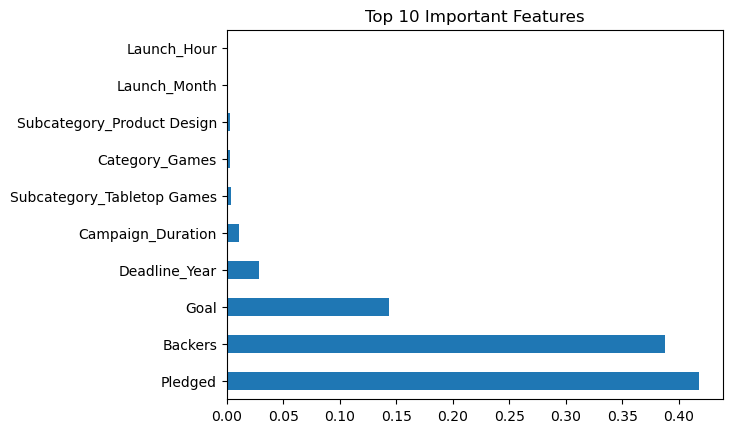


# Running 10-Fold Cross Validation:
Accuracy values for 10-fold Cross Validation:
 [0.79528095 0.77084482 0.7663529  0.78574747 0.78451071 0.7941681
 0.79400102 0.78572822 0.7740783  0.78280533]

# Final Average Accuracy from Cross-Validation: 0.78


In [80]:
# Random Forest Implementation
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt

# Initialize Random Forest with 100 estimators (trees) and max_depth=6
# criterion: Gini impurity, n_estimators: Number of trees in the forest
clf = RandomForestClassifier(n_estimators=100, max_depth=6, criterion='gini')

# Print the Random Forest model parameters
print("# Random Forest Model Parameters:")
print(clf)

# Fitting the model on Training Data
RF = clf.fit(X_train, y_train)

# Making predictions on the test set
prediction = RF.predict(X_test)

# Measuring accuracy and performance on Testing Data
print("\n# Classification Report:")
print(metrics.classification_report(y_test, prediction))

print("\n# Confusion Matrix:")
print(metrics.confusion_matrix(y_test, prediction))

# Calculate F1-Score as the accuracy metric (weighted average to handle class imbalance)
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print(f"\n# F1-Score (Weighted): {round(F1_Score, 2)}")

# Feature Importance: Plotting the top 10 most important features
print("\n# Feature Importance (Top 10):")
feature_importances = pd.Series(RF.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

# Cross-validation: Running 10-Fold Cross Validation
print("\n# Running 10-Fold Cross Validation:")
Accuracy_Values = cross_val_score(RF, X, y, cv=10, scoring='f1_weighted')

# Print individual accuracy values for each fold
print("Accuracy values for 10-fold Cross Validation:\n", Accuracy_Values)

Random_Forest_Results = round(Accuracy_Values.mean(), 2)

# Print the average accuracy from 10-Fold Cross Validation
print(f"\n# Final Average Accuracy from Cross-Validation: {Random_Forest_Results}")


## XGBoost

In [82]:
pip install xgboost

# XGBoost Model Parameters:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

# Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.02      0.04     11661
           1       0.84      0.99      0.91     59328
           2       0.89      0.98  

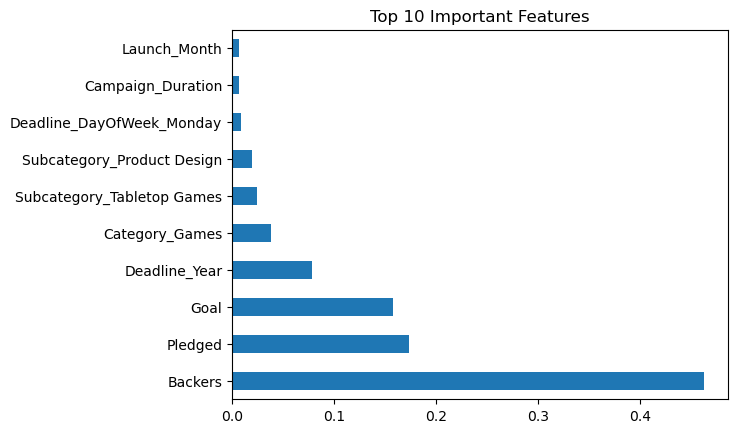


# Running 10-Fold Cross Validation:
Accuracy values for 10-fold Cross Validation:
 [0.84007355 0.78430561 0.50373409 0.6369436  0.60383334 0.5717149
 0.44064305 0.5604173  0.71105484 0.61652791]

# Final Average Accuracy from Cross-Validation: 0.63


In [83]:
# XGBoost Implementation
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt

# Initialize XGBoost with max_depth=6 and number of trees (n_estimators) set to 100
# 'multi:softmax' is the objective for multiclass classification
clf = XGBClassifier(objective='multi:softmax', num_class=5, n_estimators=100, max_depth=6)

# Print the XGBoost model parameters
print("# XGBoost Model Parameters:")
print(clf)

# Fitting the model on Training Data
XGB = clf.fit(X_train, y_train)

# Making predictions on the test set
prediction = XGB.predict(X_test)

# Measuring accuracy and performance on Testing Data
print("\n# Classification Report:")
print(metrics.classification_report(y_test, prediction))

print("\n# Confusion Matrix:")
print(metrics.confusion_matrix(y_test, prediction))

# Calculate F1-Score as the accuracy metric (weighted average to handle class imbalance)
F1_Score = metrics.f1_score(y_test, prediction, average='weighted')
print(f"\n# F1-Score (Weighted): {round(F1_Score, 2)}")

# Feature Importance: Plotting the top 10 most important features
print("\n# Feature Importance (Top 10):")
feature_importances = pd.Series(XGB.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()

# Cross-validation: Running 10-Fold Cross Validation
print("\n# Running 10-Fold Cross Validation:")
Accuracy_Values = cross_val_score(XGB, X, y, cv=10, scoring='f1_weighted')

# Print individual accuracy values for each fold
print("Accuracy values for 10-fold Cross Validation:\n", Accuracy_Values)

XGBoost_Model_Results = round(Accuracy_Values.mean(), 2)

# Print the average accuracy from 10-Fold Cross Validation
print(f"\n# Final Average Accuracy from Cross-Validation: {XGBoost_Model_Results}")


## Model Selection
These are the following accuracy values for each Model:

In [85]:
print(f'Logisitic Regression:{Logistic_Regression_Results}')
print(f'Decision Tree:{Decision_Tree_Results}')
print(f'Random Forest:{Random_Forest_Results}')
print(f'XGBoost:{XGBoost_Model_Results}')

Logisitic Regression:0.81
Decision Tree:0.82
Random Forest:0.78
XGBoost:0.63


## Neural Networks (Deep Learning - Classification)
#### Objective 2:
Classify Kickstarter campaigns into the four possible outcomes (successful, failed, cancelled, suspended, live).

In [87]:
pip install tensorflow

Epoch 1/50
8200/8200 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.7239 - loss: 0.7439 - val_accuracy: 0.8235 - val_loss: 0.4960
Epoch 2/50
8200/8200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8265 - loss: 0.5030 - val_accuracy: 0.8517 - val_loss: 0.4271
Epoch 3/50
8200/8200 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8425 - loss: 0.4565 - val_accuracy: 0.8573 - val_loss: 0.4084
Epoch 4/50
8200/8200 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8495 - loss: 0.4374 - val_accuracy: 0.8567 - val_loss: 0.4078
Epoch 5/50
8200/8200 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8539 - loss: 0.4197 - val_accuracy: 0.8604 - val_loss: 0.3918
Epoch 6/50
8200/8200 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8567 - loss: 0.4099 - val_accuracy: 0.8625 - val_loss: 0.3901
Epoch 7/50
8200/8200 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8571 - loss: 0.4084 - val_accuracy: 0.8694 - val_loss: 0.3734
Epoch 8/50
8200/8200 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8590 - loss: 0

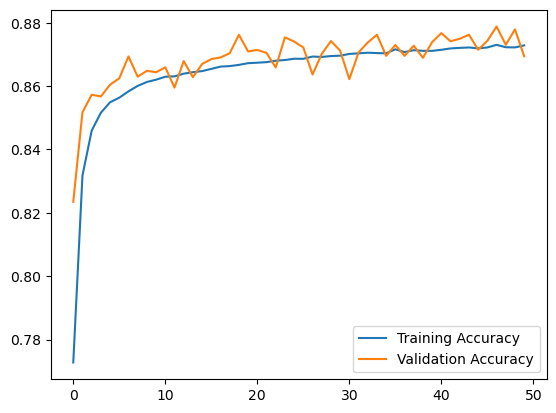

In [88]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Step 1: Data Preparation
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


# Step 2: Neural Network Architecture
model = Sequential()

# Input Layer
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden Layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Optional: Dropout layer to prevent overfitting

# Output Layer (Softmax for multi-class classification)
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## LSTM (Deep Learning - Time Series)
#### Objective 3:
Use LSTM (Long Short-Term Memory) to predict the pledged amount over time, based on historical trends.

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.0979 - val_loss: 0.0469
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0250 - val_loss: 0.0472
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0198 - val_loss: 0.0417
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0150 - val_loss: 0.0404
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0156 - val_loss: 0.0438
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0150 - val_loss: 0.0393
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - val_loss: 0.0416
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0155 - val_loss: 0.0385
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0160 - val_loss: 0.0387
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0133 - val_loss: 0.0373
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0163 - val_loss: 0.0383
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0

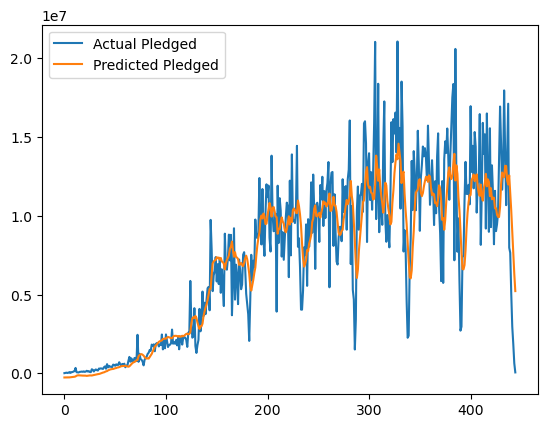

In [90]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Data Preparation
# Let's assume 'df' is your original Kickstarter dataset with 'Pledged' and 'Launched' columns.
kickstarter_df['Launched'] = pd.to_datetime(kickstarter_df['Launched'])
kickstarter_df.set_index('Launched', inplace=True)

# Resample the 'Pledged' column by week (or month) to create a time series
pledged_resampled = kickstarter_df['Pledged'].resample('W').sum()

# Normalize the pledged amount data
scaler = MinMaxScaler()
pledged_scaled = scaler.fit_transform(pledged_resampled.values.reshape(-1, 1))

# Create sequences (e.g., use 10 past weeks to predict the next week)
sequence_length = 10
X = []
y = []
for i in range(sequence_length, len(pledged_scaled)):
    X.append(pledged_scaled[i-sequence_length:i])
    y.append(pledged_scaled[i])

X, y = np.array(X), np.array(y)

# Reshape input data to (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Step 2: LSTM Model Architecture
model = Sequential()

# LSTM Layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))

# Output Layer
model.add(Dense(1))  # Output one value: the pledged amount for the next time step

# Step 3: Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the Model
predicted_pledged = model.predict(X)

# Inverse scale the predictions
predicted_pledged = scaler.inverse_transform(predicted_pledged)

# Evaluate the model using RMSE or MAE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(pledged_resampled[sequence_length:], predicted_pledged))
print(f"RMSE: {rmse}")

# Plot actual vs predicted pledged amounts
import matplotlib.pyplot as plt
plt.plot(pledged_resampled[sequence_length:].values, label='Actual Pledged')
plt.plot(predicted_pledged, label='Predicted Pledged')
plt.legend()
plt.show()